# Predicting Fraudulent Activity through Data Analytics

## Introduction

Auditing is the practice of examining businesses' financial records compared to their financial statements to ensure they comply with standard accounting laws (Hooda et. al.). It is conducted primarily through three methods known as process auditing, which verifies the processes in a business conform to predetermined rules; product auditing, which examines if a specific product or service follows the necessary requirements; finally, system auditing that involves the analysis of a management system (“What Is Auditing?”). Furthermore, there are various audit categories. For instance, internal audits are conducted within the organization, while an external audit is completely independent of the company (“What Is Auditing?”). The selected dataset is an example of an external process audit. 

The dataset used will be Audit Data, which was collected by the Comptroller and Auditor General of India for the 2015-2016 year from the Auditor General Office of the CAG. The data was collected by an external audit company and was used previously to improve algorithms predicting the quality of auditing work. The set features information from 777 various firms across 46 different cities and 14 industrial sectors in India. The purpose of this data analysis project centers on the prevention of fraudulent firm activity. Data analysis and machine learning are promising methods of determining and predicting fraud activity due to the systematic workflow which has few variations across firms. 

![title](img/picture.png)

Figure 1. Audit Work-flow from Hooda, Nishtha, et al. “Fraudulent Firm Classification: A Case Study of an External Audit.” Applied Artificial Intelligence, vol. 32, no. 1, 2018, pp. 48–64., https://doi.org/10.1080/08839514.2018.1451032

In [1]:
### Run this cell before continuing.
library(tidyverse)
library(tidymodels)
library(repr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

## Methods and Results


After a preliminary investigation into the paper utilizing this data we determined the most important factors were Score A, Score B, Money Value, Total, Loss, and History. However, to improve the final data visualization of the project we narrowed it down to two factors:  the amount of money involved in misstatements in past audits (Money_Value), and the total amount of discrepancy found in past audit reports (TOTAL), meaning that this two would be our variables and the Risk column is what we are looking to predict . We began by downloading and loading the final trial.csv  in our GitHub, which is the data found on the Audit Data website. We have decided to use Github as it is a group project and this way everyone has access to the data and can see the latest changes. When loading the data, we started unwrganling and cleaning the data by  mutating and removing all the unnecessary parts. We then were able to get a clear visualization of our first table. From there we moved on to the classification part of it. We split the data to our training and testing sets so we can use our classifier to later make predictions on on what would be our new data, and specified we wanted to use 75% of the given data, created a recipe, scaled our predictors (to make sure they were as suitable as possible) and centered them. We decided to use cross-validation which divides the data into equal chunks and compares them to make sure to get the best accuracy. This lets us choose our k that gives us the lowest RMSPE , so we created a workflow, which was composed by our recipe and mode specification. After collecting the metrics we were able to visualize our graph which plotted k vs the accuracy to be able to choose the best k value, in this case six.  With this information we were able to build our final model, only this time we used the fit model. Using this data we were able to predict from our chosen database as well as analyze the accuracy of our predictions which had 88.6% of accuracy, and added a confusion matrix which exposed that 7 Indian non-fraudulent companies are predicted fraudulent and 15 Indian fraudulent companies are predicted otherwise.

First, we load the file `trial.csv` from the `audit_data` folder in our GitHub repo. We `select()` the `Money_Value` and `TOTAL` as the variables we want to use, and the `Risk` column as the variable we try to predict. Then, we `mutate()` the `Risk` column such that it is a factor using `as_factor()`, and assign our data to an object called `audit_trial`.

In [2]:
audit_trial <- read_csv("audit_data/trial.csv") %>%
    select(Money_Value, TOTAL, Risk) %>%
    mutate(Risk = as_factor(Risk))

Parsed with column specification:
cols(
  Sector_score = col_double(),
  LOCATION_ID = col_character(),
  PARA_A = col_double(),
  SCORE_A = col_double(),
  PARA_B = col_double(),
  SCORE_B = col_double(),
  TOTAL = col_double(),
  numbers = col_double(),
  Marks = col_double(),
  Money_Value = col_double(),
  MONEY_Marks = col_double(),
  District = col_double(),
  Loss = col_double(),
  LOSS_SCORE = col_double(),
  History = col_double(),
  History_score = col_double(),
  Score = col_double(),
  Risk = col_double()
)



Then, we check and remove the rows with missing values using `is.na()` in `subset()` fuction and `na.omit()`fuction.

In [3]:
audit_trial_missing <- subset(audit_trial, is.na(TOTAL) | is.na(Money_Value))
audit_trial_missing

audit_trial_clean <- na.omit(audit_trial)
audit_trial_clean

Money_Value,TOTAL,Risk
<dbl>,<dbl>,<fct>
NA,0.23,0


Money_Value,TOTAL,Risk
<dbl>,<dbl>,<fct>
3.380,6.68,1
0.940,4.83,0
0.000,0.74,0
11.750,10.80,1
0.000,0.08,0
2.950,0.83,0
44.950,8.51,1
7.790,20.53,1
7.340,19.45,1


After cleaning our data, our next step is to create the training and test set. First use the `initial_split` function to split `audit_trial_clean`. Specify we want to use *75%* of the data. For the `strata` argument, place the variable we want to classify, `Risk`. Name the object we create `audit_split`. Next, pass the `audit_split` object to the `training` and `testing` functions and name your respective objects as `audit_training` and `audit_testing`. 

In [4]:
# Set the seed. Don't remove this!
set.seed(9999)

audit_split <- initial_split(audit_trial_clean, prop = 0.75, strata = Risk)
audit_training <- training(audit_split)
audit_testing <- testing(audit_split)

For this project, we want to see if `Money_Value` and `TOTAL` can predict `Risk`, so now we need to create a recipe for these variables. First, pass the vector `audit_training` and the predictors to the `recipe` function. To scale our predictors, use the `step_scale(all_predictors())` function. To center our predictors, use the `step_center(all_predictors())` function. We assign our recipe to an object called `audit_recipe`. 

Now, we will use cross-validation on the training data set to select which $k$ is the most optimal for our data set for k-nn classification. To be specific, we will:
- Perform a 5-fold cross-validation on the training set, create a workflow analysis with our recipe and model specification and specify that the tuning should try 10 values of $K$
- Collect the metrics from the workflow analysis 
- Plot the $K$ vs the accuracy

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          2

Operations:

Scaling for all_predictors()
Centering for all_predictors()

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


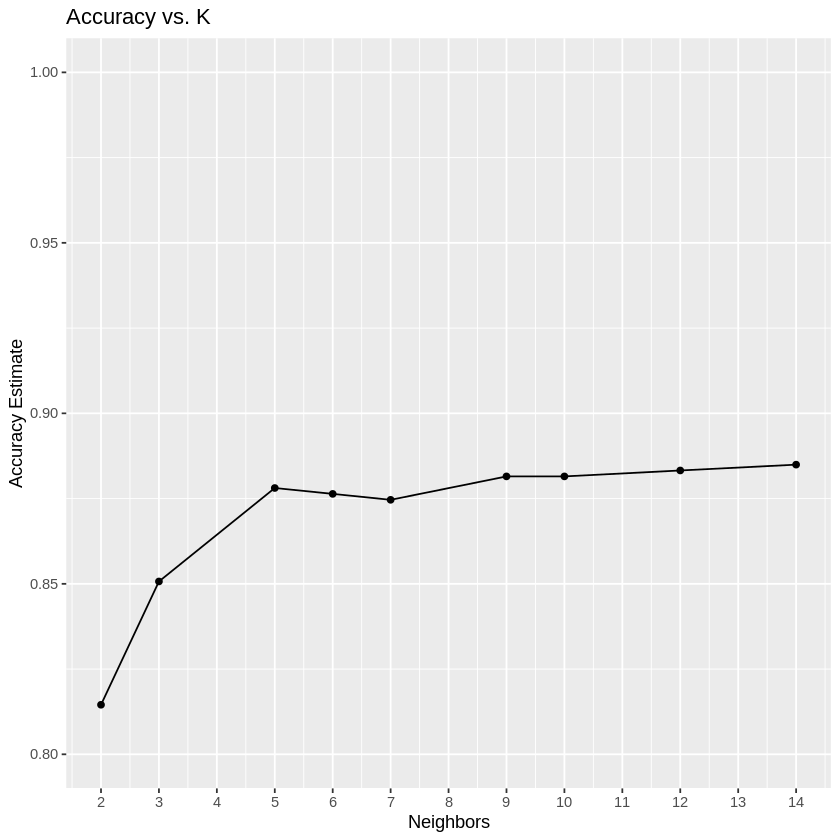

In [5]:
# Set the seed. Don't remove this!
set.seed(1234)

audit_recipe <- recipe(Risk ~ .,  data = audit_training) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())
audit_recipe

audit_vfold <- vfold_cv(audit_training, v = 5, strata = Risk)

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
      set_engine("kknn") %>%
      set_mode("classification")
knn_tune

knn_results <- workflow() %>%
      add_recipe(audit_recipe) %>%
      add_model(knn_tune) %>%
      tune_grid(resamples = audit_vfold, grid = 10) %>%
      collect_metrics()

accuracies <- knn_results %>% 
      filter(.metric == "accuracy")

accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      ggtitle("Accuracy vs. K") +
      labs(x = "Neighbors", y = "Accuracy Estimate") +
      scale_x_continuous(breaks = seq(0, 14, by = 1)) +  # adjusting the x-axis
      scale_y_continuous(limits = c(0.8, 1.0)) # adjusting the y-axis
accuracy_versus_k

As we can see, the increase of accuracy slows down when $K$ is greater than 6, so we decide to choose 6 as our $K$. Now that we have explored our data, separated the data into training and testing sets, and applied cross-validation to choose the best $k$, we can build our final model.

First, we build our model specification with the best value for $K$. Assign your answer to an object called `audit_spec`. Then, pass the model specification and the training data set to the `fit()` function. Assign your answer to an object called `audit_fit`.

At last, we use our final model to predict on the test dataset and assign this to an object called `audit_predictions`, report the accuracy of this prediction, and store this in an object named `audit_metrics`. We also report the confusion matrix and and store this in an object named `audit_conf_mat`. 

In [6]:
# Set the seed. Don't remove this!
set.seed(9999) 

audit_spec <- nearest_neighbor(weight_func = 'rectangular', neighbors = 6) %>%
       set_engine("kknn") %>%
       set_mode("classification")
audit_spec

audit_fit <- workflow() %>%
       add_recipe(audit_recipe) %>%
       add_model(audit_spec) %>%
       fit(data = audit_testing)
audit_fit

audit_predictions <- predict(audit_fit, audit_testing) %>%
       bind_cols(audit_testing)
audit_predictions

audit_metrics <- audit_predictions %>%
        metrics(truth = Risk, estimate = .pred_class) %>% 
        filter(.metric == "accuracy")
audit_metrics

audit_conf_mat <- audit_predictions %>% 
      conf_mat(truth = Risk, estimate = .pred_class)
audit_conf_mat

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 6
  weight_func = rectangular

Computational engine: kknn 


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = ~6, kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.1295337
Best kernel: rectangular
Best k: 6

.pred_class,Money_Value,TOTAL,Risk
<fct>,<dbl>,<dbl>,<fct>
1,0.94,4.83,0
0,0.00,0.74,0
1,41.28,40.17,1
1,63.18,51.64,1
0,6.78,0.75,1
1,1.16,19.03,1
0,0.00,0.43,0
1,126.13,15.38,1
1,156.92,9.51,1


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8860104


          Truth
Prediction   0   1
         0  65  15
         1   7 106

Now that we can see that our model has an accuracy of 88.6%, we will look at the confusion matrix for the classifier. This will show us the table of predicted labels and correct labels. A confusion matrix is essentially a classification matrix. The columns of the confusion matrix represent the actual class and the rows represent the predicted class (or vice versa). As we can see from the one we got, 7 Indian non-fraudulent companyies are predicted fraudulent and 15 Indian fraudulent companies are predicted other wise.

## Dicussion 

Looking at the classification model using K Nearest Neighbours the optimal number of neighbors was found to be six. Optimal due to the high accuracy of the model when the K values were graphed against the accuracy estimate and low amount of overfitting. Knowing this, the estimated accuracy could be calculated from the confusion matrix, this accuracy being 88.6%. This accuracy indicates a strong correlation between the amount of money involved in misstatements in past audits (MONEY) and the total amount of discrepancy found in past audit reports (TOTAL). Meaning if you were to calculate an Indian firm based on their misstatements and discrepancies a new firm would have an accurate prediction of whether the firm was fraudulent or normal. Out of the 193 firms studied in the final model, only seven non-fraudulent firms were predicted to be fraudulent. In future models, the aim would be to bring this number down and find a more accurate model. The predictor model has small-scale applications, however, this makes it important when analyzing Indian firms who, in the past, have submitted audits.
The difficulty would be how accurate this model is in the face of new firms that do not have a long history of being audited. If there is a collection of firms with almost no auditing data then the accuracy would nosedive. Therefore new predictors would have to be added in place of the old ones as too many predictors would make the data hard to visualize. While there are many multivariable methods of looking for fraud such as Beneish’s M-score (8 variables) or Zipf’s Law (Huang et al. 2008 , the best two predictor variables would be the firm’s growing revenue and the firms’ reported revenue. If there are discrepancies there is a clear signal of embezzlement. While this method is straightforward, collecting data on new firms is costly and there is not a breadth of historical data on these firms’ audit history. Meaning if you were to include new firms in your data would have to model the data to account for fairly new reported versus actual revenue values which, with the inclusion of your new data, would lower your predictor accuracy. These findings are quite useful however as they have provided an accurate prediction of fraud among a plethora of Indian firms. Future studies could use this model on firms from other nations with historically high amounts of fraud. 


## Bibliography 

Audit Data Data Set. UCI Machine Learning Repository: Audit Data Data Set. (n.d.). Retrieved December 8, 2021, from https://archive.ics.uci.edu/ml/datasets/Audit+Data. 

Bloomenthal, A. (2021, December 7). Detecting financial statement fraud. Investopedia. Retrieved December 9, 2021, from https://www.investopedia.com/articles/financial-theory/11/detecting-financial-fraud.asp. 

Hooda, N., Bawa, S., & Rana, P. S. (2018). Fraudulent firm classification: A case study of an external audit. Applied Artificial Intelligence, 32(1), 48–64. https://doi.org/10.1080/08839514.2018.1451032 

What is auditing? ASQ. (n.d.). Retrieved December 9, 2021, from https://asq.org/quality-resources/auditing. 

Huang, S.-M., Yen, D. C., Yang, L.-W., & Hua, J.-S. (2008). An investigation of Zipf's law for fraud detection (DSS#06-10-1826R(2)). Decision Support Systems, 46(1), 70–83. https://doi.org/10.1016/j.dss.2008.05.003 